## Sentiment Analysis

### Twitter Dataset

#### Loading the data

In [53]:
import spacy
import en_core_web_sm 
import pandas as pd 
import seaborn as sns  
import numpy as np 
import re 
import random 

In [54]:
train_data = pd.read_csv("train.csv", header=None, names = ['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding='latin1')

In [55]:
train_data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [56]:
train_data['sentiment'].unique()

array([0, 4])

In [57]:
np.unique(train_data['sentiment'], return_counts=True)

(array([0, 4]), array([800000, 800000]))

In [58]:
train_data = train_data.drop(['id', 'date', 'query', 'user'], axis=1)

In [59]:
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Train and test data

In [60]:
X = train_data.iloc[:, 1].values
y = train_data.iloc[:, 0].values

In [61]:
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [62]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size=0.97)

In [63]:
X.shape

(48000,)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [65]:
X_train.shape

(38400,)

In [66]:
np.unique(y_train, return_counts=True)

(array([0, 4]), array([19155, 19245]))

In [67]:
np.unique(y_test, return_counts=True)

(array([0, 4]), array([4782, 4818]))

## Preprocessing the data

In [68]:
nlp = spacy.load('en_core_web_sm')
nlp

In [69]:
def preprocessing(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
    sentence = re.sub(r"https?://[A-Za-z0-9./]+", ' ', sentence)
    sentence = sentence.replace('.', '')
    tokens = []
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token)==1)]
    tokens = ' '.join([element for element in tokens])
    return tokens

In [70]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [71]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [72]:
len(X_train_cleaned)

38400

In [87]:
for _ in range(10):
    print(X_train_cleaned[random.randint(0, len(X_train_cleaned) - 1)])

harrowing interestingly reaction twitter
oki think weekbut
like said
fkn miss youuuuuuuuuu days
rafa wimbledon check man oh man
pc like
oh makes feel real special
omg crazy weather
dying saturday night cold
omg think gon na listening rent stefani daily commute need car


In [88]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

In [89]:
X_test_cleaned

['watchin movies wit fam',
 'hmmm saw thing commericial sprintseeing help',
 'bored',
 'buttons anime characters bag taken party got em friends london',
 'working saturday sucks wish nap',
 'hiding room couple hours dad record lines hurts laying long',
 'episode amazingi cried saw home videos soooooo cute',
 'testing hulu desktop reminds shittier version boxy feels clunky search hidden menu system questionable',
 'monday time la shooting new music video quot;time wake up&quot wo0o0hhho0o0o',
 'exams oh wish likes exams',
 'mood hang',
 'eating chocolate bout watch dr missing jacob',
 'started homework suck sure wish weekend raining happy',
 'rofl ashamed need song recs dearie',
 'damn time ready work againgrumble grumble',
 'watching criminal minds s1e13 tear jerker',
 'bike holdshould known argh total bummer',
 'pray trying remain positive',
 'watch latest season probably wo like anymore fortunately lost continue impress',
 'happy quot;mental picture&quot hit multiply',
 'sure like lo

### WordCloud

In [90]:
texts = ''
for text in X_train_cleaned:
    texts += ' ' + text 

In [91]:
texts

" lmfao lucky girl ta need toothpaste lmfao coming people expect try live expectations crushes leaves wreck broken dreams target ur making sad nite nite love office space higher closer downtown mpls adding commute higher space small biz waiting whipped cream thaw practically frozen eat red pepper fun dares mouth burning wife said day moloney thanks tip cover help eating breakfast bagel bumed nt find meg twitter mo porn vidz britney followerz ds haha ian quited thecabb alex cutie hot keepers bout alexjohnson amp manger likely weekend finished book buy ignoring raining cats dogs golfing watching confession teenage drama queen mcflyforgermany mcflyforgermany mcflyforgermany mcflyforgermany mcflyforgermany mcflyforgermany wir sind raus gold gym afternoon sounds nice shame raining hull england sugar free sucks new flight control app update lost blood arms excited minute trip sydney week thanks dad commencin consider super hungry notice laughing odds nice place miley argentina want love 2day

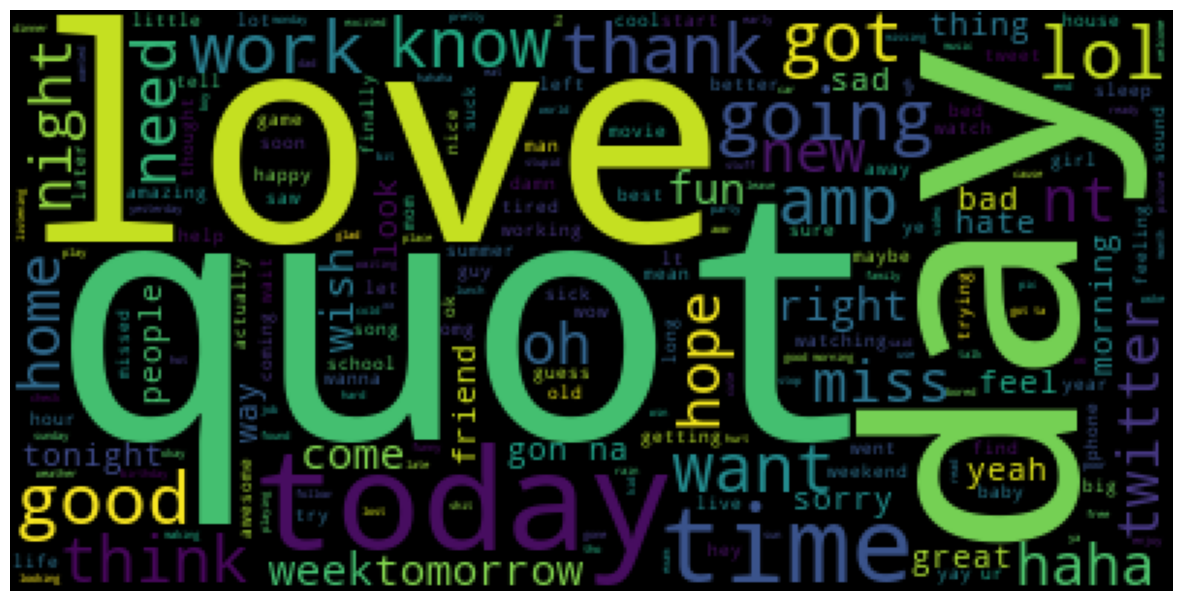

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

### Detecting languages

!pip install langdetect

In [108]:
from langdetect import detect,LangDetectException

In [98]:
detect('English text')

'en'

In [99]:
detect('este e um')

'pt'

In [101]:
detect('este es un texto un espanol')

'es'

In [109]:
languages = []
for text in X_test_cleaned:
    if text.strip():  # Ensure text is not empty or just whitespace
        try:
            language = detect(text)
        except LangDetectException:
            language = 'unknown'  # Mark texts where language couldn't be detected
    else:
        language = 'unknown'  # Mark empty texts
    languages.append(language)

In [110]:
np.unique(languages, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'unknown', 'vi'],
       dtype='<U7'),
 array([ 538,   58,   16,  165,  128,   25, 6808,   59,  137,   64,  141,
          26,   13,   79,  121,   13,    5,  184,  154,   52,   16,   66,
          24,   40,  267,   17,   76,   47,  160,   28,   66,    7]))

### Sentiment analysis using nltk

In [111]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dhirajbarela/nltk_data...


True

In [112]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [113]:
nltk_classifier = SentimentIntensityAnalyzer()
nltk_classifier.polarity_scores('I love this food')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [114]:
nltk_classifier.polarity_scores('I hate this food')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [115]:
nltk_classifier.polarity_scores('I have this food')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [116]:
X_train_cleaned[0]

'lmfao lucky girl ta need toothpaste lmfao coming'

In [117]:
nltk_classifier.polarity_scores(X_train_cleaned[0])

{'neg': 0.0, 'neu': 0.338, 'pos': 0.662, 'compound': 0.8689}

In [118]:
X_train_cleaned[2002]

'@_soval ooc fine understood'

In [119]:
nltk_classifier.polarity_scores(X_train_cleaned[2002])

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.2023}

In [120]:
for sentence in X_test:
    print(nltk_classifier.polarity_scores(sentence), '-', sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - watchin movies wit the fam... 
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.6124} - hmmm saw this thing on a commericial for sprint...seeing what its about help me if you can please 
{'neg': 0.705, 'neu': 0.295, 'pos': 0.0, 'compound': -0.3384} - so bored 
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.7003} - @camarilladesign there were buttons of anime characters on my bag and one of them was taken at the party. i got em with friends in london 
{'neg': 0.223, 'neu': 0.536, 'pos': 0.241, 'compound': 0.0516} - working on a saturday sucks  wish i could take a nap
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.68} - I've been hiding out in my room for the last couple hours so dad could record lines. My back hurts from laying down so long! 
{'neg': 0.14, 'neu': 0.699, 'pos': 0.161, 'compound': 0.1027} - @Jonasbrothers The episode was AMAZING...I cried when I saw the home videos they were soooooo cute 
{'neg':

### Sentiment analysis with TF-IDF

In [121]:
X_train_cleaned[0:5]

['lmfao lucky girl ta need toothpaste lmfao coming',
 'people expect try live expectations crushes leaves wreck broken dreams',
 'target',
 'ur making sad nite nite love',
 'office space higher closer downtown mpls adding commute higher space small biz']

In [122]:
y_train

array([0, 0, 4, ..., 4, 0, 4])

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

In [124]:
X_train_tfidf.toarray().shape

(38400, 33412)

In [125]:
vectorizer.get_feature_names_out()

array(['00', '000', '007episode', ..., 'ø²ù', 'ø³ø', 'ø¹ù'], dtype=object)

In [126]:
def preprocessing_lemma(sentence):
    tokens = []
    tokens = [token.lemma_ for token in nlp(sentence)]
    tokens = ' '.join([element for element in tokens])
    return tokens

In [127]:
preprocessing_lemma('learn learned learning')

'learn learn learn'

In [129]:
X_train_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_train_cleaned]

In [130]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned_lemma)

In [131]:
X_train_tfidf.shape

(38400, 30002)

In [132]:
X_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_test_cleaned]

In [133]:
X_test_tfidf = vectorizer.transform(X_test_cleaned_lemma)

In [134]:
X_test_tfidf.shape

(9600, 30002)

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [137]:
predictions = classifier.predict(X_test_tfidf)

In [138]:
predictions

array([4, 4, 0, ..., 4, 4, 0])

In [139]:
y_test

array([4, 4, 0, ..., 4, 4, 0])

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
accuracy_score(y_test, predictions)

0.6758333333333333

In [142]:
cm = confusion_matrix(y_test, predictions)
cm

array([[3343, 1439],
       [1673, 3145]])

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4782
           4       0.69      0.65      0.67      4818

    accuracy                           0.68      9600
   macro avg       0.68      0.68      0.68      9600
weighted avg       0.68      0.68      0.68      9600



### Sentiment Analysis Using SpaCy

* Documentation: https://spacy.io/usage/training

In [ ]:
example = [["this is a positive text", {"POSITIVE": True, "NEGATIVE": False}],
           ["this is a negative text", {"POSITIVE": False, "NEGATIVE": True}]]

In [145]:
X_train_spacy = []
for text, sentiment in zip(X_train_cleaned_lemma, y_train):
    # print(text, sentiment)
    if sentiment == 4:
        dic = ({"POSITIVE": True, "NEGATIVE": False})
    elif sentiment == 0:
        dic = ({"POSITIVE": False, "NEGATIVE": True})
    X_train_spacy.append([text, dic.copy()])

In [146]:
X_train_spacy[0:5]

[['lmfao lucky girl ta need toothpaste lmfao come',
  {'POSITIVE': False, 'NEGATIVE': True}],
 ['people expect try live expectation crush leave wreck break dream',
  {'POSITIVE': False, 'NEGATIVE': True}],
 ['target', {'POSITIVE': True, 'NEGATIVE': False}],
 ['ur make sad nite nite love', {'POSITIVE': False, 'NEGATIVE': True}],
 ['office space higher close downtown mpls add commute high space small biz',
  {'POSITIVE': False, 'NEGATIVE': True}]]

In [147]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [148]:
classifier_spacy = spacy.blank('en')
classifier_spacy.pipe_names

[]

In [149]:
textcat = classifier_spacy.add_pipe('textcat')
classifier_spacy.pipe_names

['textcat']

In [150]:
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

1

In [151]:
textcat.label_data

('POSITIVE', 'NEGATIVE')

In [152]:
len(X_train_spacy)

38400

In [153]:
38400/1024

37.5

In [176]:
from spacy.training import Example
classifier_spacy.begin_training()
for epoch in range(100):
    random.shuffle(X_train_spacy)
    losses = {}
    for batch in spacy.util.minibatch(X_train_spacy, 1024):
        texts = [classifier_spacy.make_doc(text) for text, entities in batch]
        annotations = [{'cats': entities} for text, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(texts, annotations)]
        classifier_spacy.update(examples, losses=losses)
    print(losses)

{'textcat': 7.844445779919624}
{'textcat': 5.872962772846222}
{'textcat': 4.408694744110107}
{'textcat': 2.9496128633618355}
{'textcat': 1.8227582275867462}
{'textcat': 1.182367566972971}
{'textcat': 0.8778169099241495}
{'textcat': 0.7040293850004673}
{'textcat': 0.6712340386584401}
{'textcat': 0.6084937499836087}
{'textcat': 0.5858064917847514}
{'textcat': 0.5468925833702087}
{'textcat': 0.5506362188607454}
{'textcat': 0.5007031406275928}
{'textcat': 0.49506491143256426}
{'textcat': 0.48157763108611107}
{'textcat': 0.4872074080631137}
{'textcat': 0.493913437705487}
{'textcat': 0.5015803654678166}
{'textcat': 0.4828697685152292}
{'textcat': 0.43854845548048615}
{'textcat': 0.44662569370120764}
{'textcat': 0.4420201783068478}
{'textcat': 0.42383840726688504}
{'textcat': 0.42938766814768314}
{'textcat': 0.419661576859653}
{'textcat': 0.4194299215450883}
{'textcat': 0.4035221813246608}
{'textcat': 0.3937865747138858}
{'textcat': 0.38609758485108614}
{'textcat': 0.3799908012151718}
{'textc

In [177]:
classifier_spacy.to_disk('classifier_spacy')

In [178]:
classifier_spacy_loaded = spacy.load('classifier_spacy')
classifier_spacy_loaded

In [179]:
y_test[4862]

4

In [180]:
postitive_text = X_test_cleaned_lemma[4862]
postitive_text

'vote diversity brother epic win brother good taste'

In [181]:
prediction = classifier_spacy_loaded(postitive_text)
prediction

vote diversity brother epic win brother good taste

In [182]:
prediction.cats

{'POSITIVE': 0.9945353269577026, 'NEGATIVE': 0.005464635789394379}

In [183]:
classifier_spacy_loaded('i hate this food').cats

{'POSITIVE': 4.137199721299112e-05, 'NEGATIVE': 0.9999586343765259}

In [184]:
y_test[4863]

0

In [185]:
negative_text = X_test_cleaned_lemma[4863]
negative_text

'davina shall stand usual spot stairsplease cue card'

In [186]:
prediction = classifier_spacy_loaded(negative_text)
prediction.cats

{'POSITIVE': 0.011798912659287453, 'NEGATIVE': 0.9882011413574219}

In [187]:
predictions = []
for text in X_test_cleaned_lemma:
    prediction = classifier_spacy_loaded(text)
    predictions.append(prediction.cats)

In [188]:
predictions

[{'POSITIVE': 0.9999178647994995, 'NEGATIVE': 8.208995132008567e-05},
 {'POSITIVE': 0.9994563460350037, 'NEGATIVE': 0.0005436331266537309},
 {'POSITIVE': 6.3149600464385e-05, 'NEGATIVE': 0.9999368190765381},
 {'POSITIVE': 4.226832606946118e-05, 'NEGATIVE': 0.9999576807022095},
 {'POSITIVE': 0.0002012181794270873, 'NEGATIVE': 0.9997988343238831},
 {'POSITIVE': 0.5287092924118042, 'NEGATIVE': 0.4712907671928406},
 {'POSITIVE': 0.0004330950614530593, 'NEGATIVE': 0.9995668530464172},
 {'POSITIVE': 0.010556962341070175, 'NEGATIVE': 0.9894430637359619},
 {'POSITIVE': 0.9999948740005493, 'NEGATIVE': 5.095794222143013e-06},
 {'POSITIVE': 0.06647615134716034, 'NEGATIVE': 0.9335238337516785},
 {'POSITIVE': 0.940708577632904, 'NEGATIVE': 0.05929142236709595},
 {'POSITIVE': 6.769528226868715e-06, 'NEGATIVE': 0.9999932050704956},
 {'POSITIVE': 0.800265908241272, 'NEGATIVE': 0.19973406195640564},
 {'POSITIVE': 0.0014597421977669, 'NEGATIVE': 0.9985402822494507},
 {'POSITIVE': 6.3973975557019e-06, 'N

In [189]:
predictions2 = []
for prediction in predictions:
    if prediction["POSITIVE"] > prediction["NEGATIVE"]:
        predictions2.append(4)
    else:
        predictions2.append(0)
predictions2 = np.array(predictions2)

In [190]:
predictions2

array([4, 4, 0, ..., 0, 4, 0])

In [191]:
y_test

array([4, 4, 0, ..., 4, 4, 0])

In [192]:
accuracy_score(y_test, predictions2)

0.6891666666666667

In [193]:
cm = confusion_matrix(y_test, predictions2)
cm


array([[3421, 1361],
       [1623, 3195]])

In [194]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      4782
           4       0.70      0.66      0.68      4818

    accuracy                           0.69      9600
   macro avg       0.69      0.69      0.69      9600
weighted avg       0.69      0.69      0.69      9600

